## Set up

In [1]:
%run -i ../notebooks/functions/functions.py
%run -i ../notebooks/functions/ML_functions.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geoplot
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
master_df = pd.read_csv('../processed_data/master.csv')

#split out lat, long info
X = master_df.iloc[:, 2:]
lat_lng = master_df.iloc[:, 0:2]

In [5]:
### ### ### ### ### ### ### ### ### ### ###
X.drop(['DAY CARE', 'wellbeing/hotels', 'density/p_meter', 'NON-PUBLIC K-12 SCHOOLS', 'acres', 'rest_insp_score'], axis=1, inplace=True)

In [6]:
X.head(1)

,Population,traffic,buildings,legalstories,rating,price,wellbeing/libraries,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
0,51739.0,244.032407,70.0,1.0,3.23,1.96,2.0,1.0,4.0


In [7]:
#Scaling the data
scaler = StandardScaler()
#fit scaler to data
scaler.fit(X.values)

#transform and save into new dataframe
X_std = pd.DataFrame(scaler.transform(X.values), 
                                columns = X.columns)

## Radar Plots

### K-means

In [8]:
df_latlong = pd.read_csv('../processed_data/NTA_coords.csv')
df_latlong = df_latlong * 18

X_std = pd.concat([X_std, df_latlong], axis=1)
#X_std = df_latlong

In [9]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', random_state=1, max_iter=100)
## clustering
clusters = model.fit_predict(X_std)

X_std.drop(['NTA_lat', 'NTA_long'], axis=1, inplace=True)

#Create dataframe with scaled data and cluster info
cluster_df = pd.concat([X_std, pd.DataFrame(clusters)], axis=1)
cluster_df = cluster_df.rename(columns = {0: 'clusters'})

In [10]:
df_list = []
X_plt = pd.concat([lat_lng, cluster_df], axis=1)
#for each cluster seperate from master dataframe and append to list
for i in range(0, k):
    df_list.append(X_plt.loc[X_plt['clusters'] == i])

#zip each clustered dataframe in the list
cluster_dfs = llz_set(df_list)

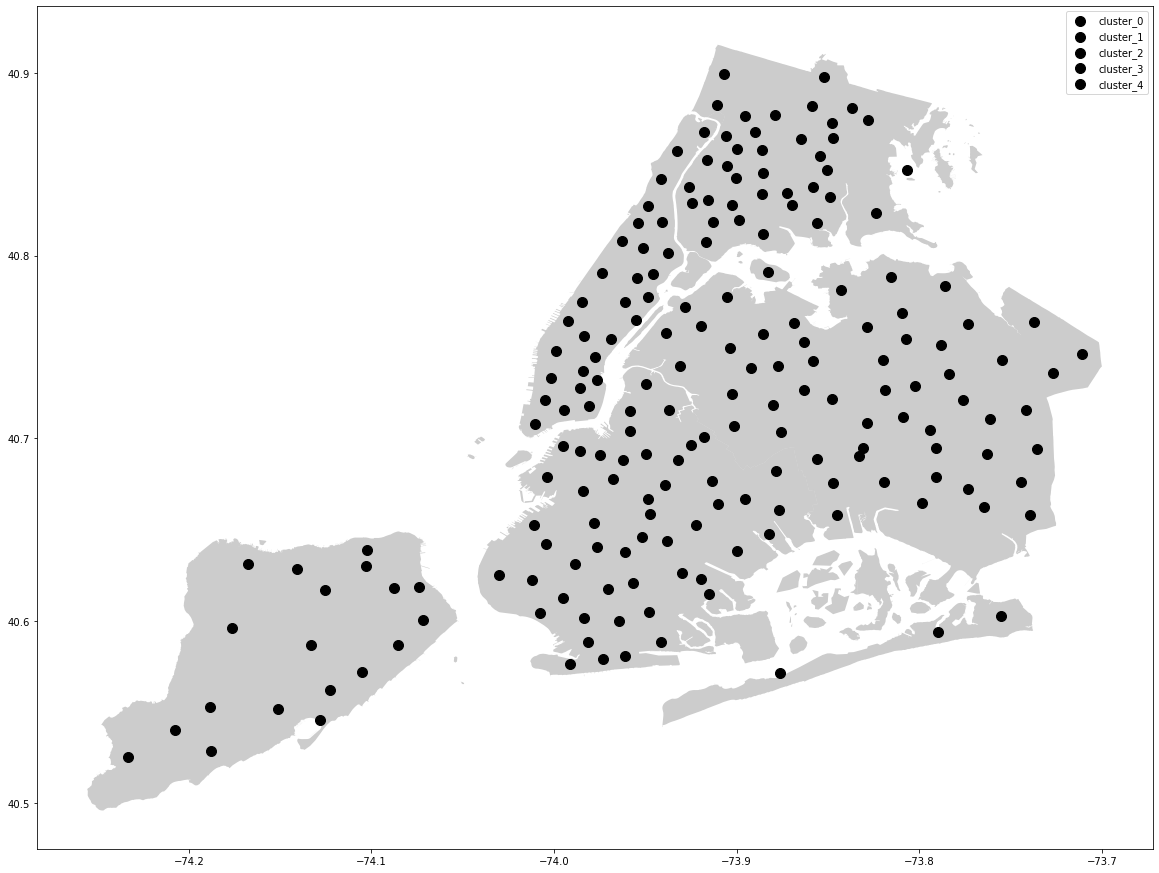

In [11]:
fig,ax=plt.subplots(figsize=(20,20))
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
boroughs.plot(ax=ax,alpha=0.4,color="grey")

#loop through each cluster
for i in range(len(cluster_dfs)):
    cluster_dfs[i].plot(ax = ax, markersize = 100, marker = 'o', label = f"cluster_{i}")
#plt.legend()
#plt.savefig('../figures/clustering/clustering_6.png')

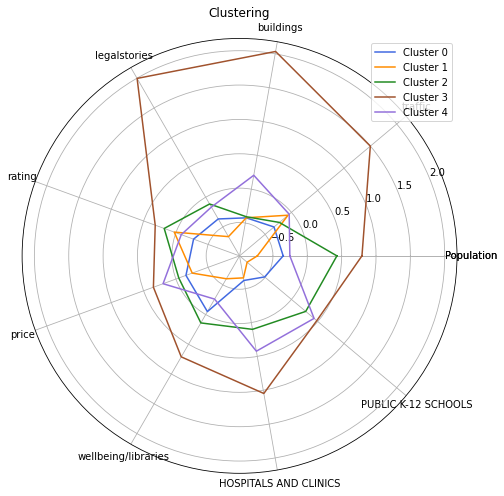

In [12]:
radar_plot(X_std, clusters)  # , save='../figures/radar/cluster_plotv5.png'